In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
from zipfile import ZipFile

# Menentukan File Zip
file_name = '/content/content/Flowers/archive_9.zip'

# Menentukan target directory
target_directory = '/content/Flowers'

# Membuat target direktori jika tidak tersedia
os.makedirs(target_directory, exist_ok=True)

# Membuka zip file dalam mode baca
with ZipFile(file_name, 'r') as zip:
  # Print semua konten dari file Zip
  zip.printdir()

  # Ekstrak semua file ke target direktori
  print('Extracting all the files now...')
  zip.extractall(target_directory)
  print('Done!')

File Name                                             Modified             Size
README.dataset.txt                             2023-11-30 04:22:00         1400
README.roboflow.txt                            2023-11-30 04:22:00          316
test/daisy/10466290366_cc72e33532_jpg.rf.6ddc91cd5d4a6a683e567ccb37e5a089.jpg 2023-11-30 04:22:00        61293
test/daisy/10466558316_a7198b87e2_jpg.rf.7acf642b94dc98daa49482a12994ac4c.jpg 2023-11-30 04:22:00        49864
test/daisy/12193032636_b50ae7db35_n_jpg.rf.e6c4eeb71c56e793a0d85f6d979dbe20.jpg 2023-11-30 04:22:00        41757
test/daisy/1342002397_9503c97b49_jpg.rf.8fe6bdd23186b70f089bb0c5b89d314e.jpg 2023-11-30 04:22:00        30826
test/daisy/1354396826_2868631432_m_jpg.rf.409eee37613d16dbc71365cb5615327e.jpg 2023-11-30 04:22:00        44582
test/daisy/1374193928_a52320eafa_jpg.rf.e398f632151f3ccc5729bc89527d7614.jpg 2023-11-30 04:22:00        34360
test/daisy/1392131677_116ec04751_jpg.rf.da99f9bb579ee96dc1728545ca519d6f.jpg 2023-11-30 04:22

In [ ]:
# Import semua yang diperlukan

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
# Menentukan direktori dataset

target_directory = '/content/Flowers'
train_dir = os.path.join(target_directory, 'train')
valid_dir = os.path.join(target_directory, 'valid')
test_dir = os.path.join(target_directory, 'test')

In [ ]:
# Mencetak jumlah file di dalam masing - masing direktori

def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_count = count_files(train_dir)
valid_count = count_files(valid_dir)
test_count = count_files(test_dir)

print(f'Number of training files: {train_count}')
print(f'Number of validation files: {valid_count}')
print(f'Number of testing files: {test_count}')


Number of training files: 1275
Number of validation files: 364
Number of testing files: 182


In [ ]:
# Membuat ImageDataGenerator untuk memuat gambar

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Memuat gambar dari direktori dan memberikan label berdasarkan nama subdirektori

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1275 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [ ]:
# Menampilkan label yang dihasilkan

print("Class indices:", train_generator.class_indices)

Class indices: {'daisy': 0, 'dandelion': 1}


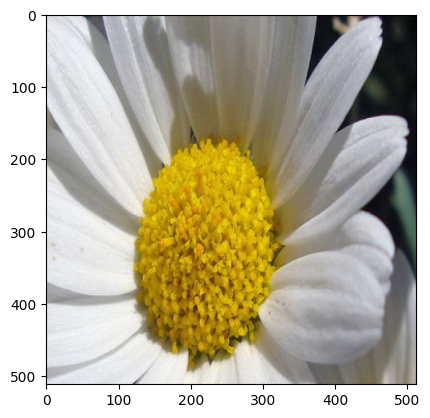

In [ ]:
# Menampilkan salah satu contoh gambar yang ada di dataset

img = mpimg.imread('/content/Flowers/valid/daisy/10140303196_b88d3d6cec_jpg.rf.ffe380b34f7886e83d843b8c3ec04e8c.jpg')
imgplot = plt.imshow(img)

In [ ]:
# Membuat Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Menampilkan summery model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# Compiling model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Melakukan training dengan 10 epocs

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

Epoch 1/10
39/39 [==============================] - 82s 2s/step - loss: 0.8514 - accuracy: 0.5865 - val_loss: 0.6349 - val_accuracy: 0.6136
Epoch 2/10
39/39 [==============================] - 84s 2s/step - loss: 0.5818 - accuracy: 0.6879 - val_loss: 0.4899 - val_accuracy: 0.7642
Epoch 3/10
39/39 [==============================] - 85s 2s/step - loss: 0.4818 - accuracy: 0.7780 - val_loss: 0.4848 - val_accuracy: 0.7812
Epoch 4/10
39/39 [==============================] - 96s 2s/step - loss: 0.4050 - accuracy: 0.8311 - val_loss: 0.3700 - val_accuracy: 0.8438
Epoch 5/10
39/39 [==============================] - 87s 2s/step - loss: 0.3395 - accuracy: 0.8552 - val_loss: 0.4883 - val_accuracy: 0.7642
Epoch 6/10
39/39 [==============================] - 78s 2s/step - loss: 0.3179 - accuracy: 0.8584 - val_loss: 0.3737 - val_accuracy: 0.8210
Epoch 7/10
39/39 [==============================] - 78s 2s/step - loss: 0.2534 - accuracy: 0.8922 - val_loss: 0.3548 - val_accuracy: 0.8523
Epoch 8/10
39/39 [==

In [ ]:
# Mengevaluasi model

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {accuracy * 100:.2f}%')

5/5 [==============================] - 3s 481ms/step - loss: 0.4812 - accuracy: 0.8125
Test accuracy: 81.25%


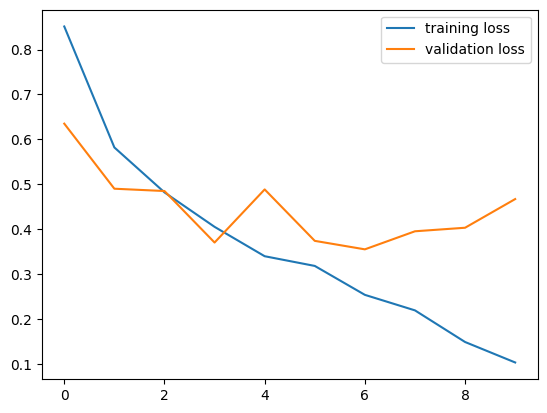

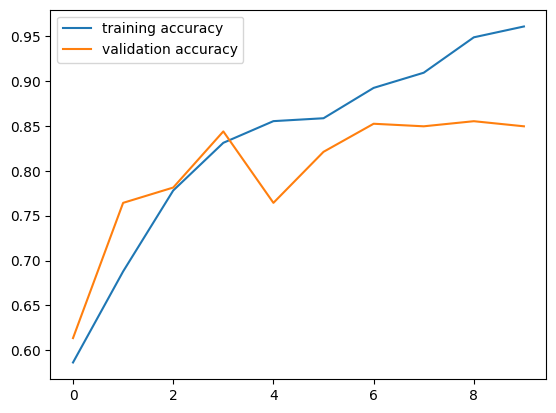

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

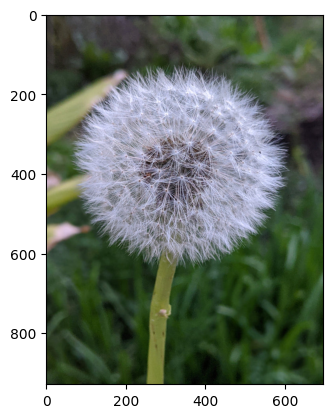

1/1 [==============================] - 0s 103ms/step
[[0.9929429]]
1
The flower in the image is a dandelion


<ipython-input-59-9d5eb4b7c5e8>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_pred_label = int(input_prediction > 0.5)


In [ ]:
# Path ke gambar input
input_image_path = '/content/drive/MyDrive/Flowers/dandelion.jpg'

# Memuat gambar menggunakan matplotlib
input_image = mpimg.imread(input_image_path)
imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (150, 150))

input_image_scaled = input_image_resized / 255.0

# Mengubah bentuk gambar menjadi sesuai dengan input model
input_image_reshaped = np.reshape(input_image_scaled, [1, 150, 150, 3])

# Melakukan prediksi dengan model
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# Karena ini adalah masalah klasifikasi biner, hasil prediksi akan berupa probabilitas kelas 1
input_pred_label = int(input_prediction > 0.5)
print(input_pred_label)

# Menampilkan hasil prediksi
if input_pred_label == 1:
    print('The flower in the image is a dandelion')
else:
    print('The flower in the image is a daisy')
